In [170]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
os.chdir('C:\\Users\\jiawy\\Desktop')

C:\Users\jiawy\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\jiawy\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
df = pd.read_csv('titanic.csv')

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
#finding missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
#fill the missing value with mean
df['Age']  = df['Age'].fillna(df['Age'].mean())

In [89]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
#drop unecessary columns
df = df.drop(['Name','PassengerId','Ticket'],axis=1)

In [92]:
#check cabin whether is important feature for survived or not
df.groupby(df['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [93]:
#clean and to categorise cabin
df['Cabin'] = np.where(df['Cabin'].isnull(),0,1)

In [94]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [95]:
#categorial sex column
gender = {'male':0,'female':1}
df['Sex'] = df['Sex'].map(gender)

In [96]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,0,S
1,1,1,1,38.0,1,0,71.2833,1,C
2,1,3,1,26.0,0,0,7.9250,0,S
3,1,1,1,35.0,1,0,53.1000,1,S
4,0,3,0,35.0,0,0,8.0500,0,S


In [97]:
df.groupby('Embarked').count()['Survived']

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [98]:
df = df.drop('Embarked',axis=1)

In [122]:
X = df.drop('Survived',axis=1).values
y = df['Survived'].values

In [123]:
#split into train test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [124]:
xval,xtest,yval,ytest = train_test_split(xtest,ytest,test_size=0.5,random_state=42)

In [102]:
for i in (ytrain,yval,ytest):
    print(len(i)/len(y))

0.5993265993265994
0.19977553310886645
0.20089786756453423


In [103]:
import seaborn as sns

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [105]:
lr = LogisticRegression(max_iter=100000).fit(xtrain,ytrain)
param = {'C':[0.001,0.01,0.1,1,10,100,1000],'solver':('lbfgs',
'sag', 'saga','newton-cg')}

C:\Users\jiawy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
gscv = GridSearchCV(estimator=lr,param_grid=param,cv=5)

In [113]:
gscv.fit(xtrain,ytrain)

C:\Users\jiawy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ('lbfgs', 'sag', 'saga', 'newton-cg')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
gscv.best_params_
gscv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
lr = LogisticRegression(C=1,solver='lbfgs',max_iter=10000).fit(xtrain,ytrain)

In [110]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
lr.score(xtest,ytest)

0.8268156424581006

In [112]:
pred = lr.predict(xtest)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       103
           1       0.85      0.72      0.78        76

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



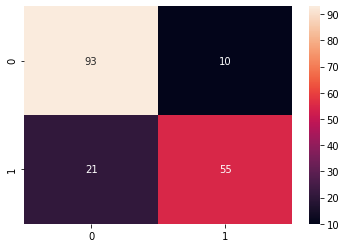

In [93]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

In [119]:
#statistical model
x = df.drop('Survived',axis=1)
y = df['Survived']
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     84.05
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           1.58e-93
Time:                        12:58:03   Log-Likelihood:                -394.48
No. Observations:                 891   AIC:                             805.0
Df Residuals:                     883   BIC:                             843.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6745      0.082      8.248      0.000       0.514       0.835
Pclass        -0.1305      0.024     -5.331      0.000      -0.179      -0.082
Sex            0.5092      0.028     18.279      0.000       0.455       0.564
Age           -0.0059      0.001     -5.514      0.000      -0.008      -0.004
SibSp         -0.0426      0.013     -3.284      0.001      -0.068      -0.017
Parch         -0.0215      0.018     -1.192      0.234      -0.057       0.014
Fare           0.0003      0.000      0.923      0.357      -0.000       0.001
Cabin          0.1197      0.044      2.697      0.007       0.033       0.207
==============================================================================
Omnibus:                       36.508   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.024
Skew:                           0.515   Prob(JB):                     2.04e-09
Kurtosis:                       3.138   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Survived    1.000000
Sex         0.543351
Cabin       0.316912
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

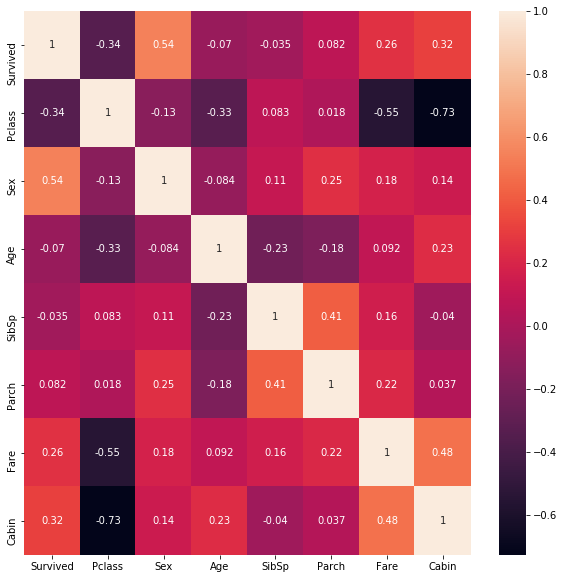

In [118]:
#viewing correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
df.corr()['Survived'].sort_values(ascending=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002368D26FB08>,
      dtype=object)

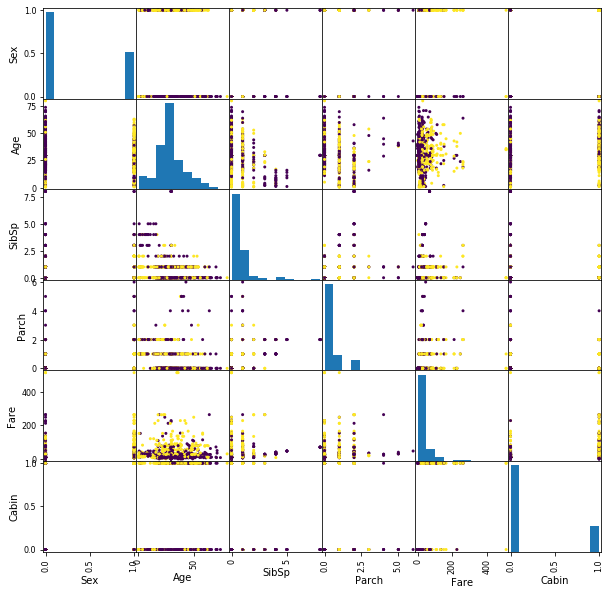

In [117]:
#visualize relationship between features based on Survived or not
pd.plotting.scatter_matrix(df.loc[:,'Sex':'Cabin'],figsize=(10,10),c=df['Survived'],diagonal='hist',alpha=1)

In [161]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=12).fit(xtrain,ytrain)
print(rfc.score(xtrain,ytrain))
print(rfc.score(xtest,ytest))
#training score is better than testing score which is sign of overfitting

0.9681647940074907
0.7877094972067039


C:\Users\jiawy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [162]:
#finding best parameters
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[8,9,10,11,12,13,14,15],'max_depth':[1,2,3,4,5,6,7,8]}
gscv = GridSearchCV(rfc,param,cv=5).fit(xtrain,ytrain)
print(gscv.best_params_)
print(gscv.best_estimator_)

{'max_depth': 8, 'n_estimators': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)


C:\Users\jiawy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [176]:
rfc = RandomForestClassifier(max_depth=8,n_estimators=10,random_state=0).fit(xtrain,ytrain)
print(rfc.score(xtrain,ytrain))
print(rfc.score(xtest,ytest))
#accuracy increase on test data

0.9269662921348315
0.8156424581005587


[0.09225645 0.33205926 0.18465634 0.06188518 0.05419809 0.21103097
 0.0639137 ]


<Figure size 1440x1440 with 0 Axes>

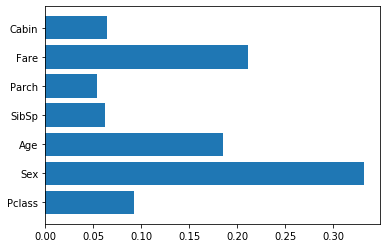

<Figure size 1440x1440 with 0 Axes>

In [168]:
#visulize feature importantce chosen by RandomForestClassifier
print(rfc.feature_importances_)
X = df.drop('Survived',axis=1)
n_features = xtrain.shape[1]
plt.barh(range(n_features),rfc.feature_importances_,align='center')
plt.yticks(range(n_features),X.columns)
plt.figure(figsize=(20,20))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.83      0.71      0.77        76

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



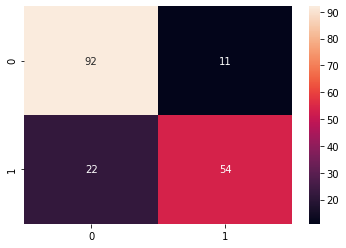

In [188]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix
pred = rfc.predict(xtest)
print(classification_report(ytest,pred))

#visualize confusion matrix
sns.heatmap(confusion_matrix(ytest,pred),annot=True)